<a href="https://www.kaggle.com/code/mustafaabdelnasser16/customer-behavioral-segmentation?scriptVersionId=129925568" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/one-year-retail-transactions/Retail_Transactions.xlsx


# First exercise: Conduct a detailed explanatory data analysis for behavioral segmentation

### Step 1: Import the necessary libraries and load the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the dataset
dataset = pd.read_excel('/kaggle/input/one-year-retail-transactions/Retail_Transactions.xlsx') 
df = dataset.copy()

In [4]:
# Display the first few rows of the dataset
df.head()

,UCID,GENDER,AGE_GROUP2,MEMBERSHIP_DATE,BRAND_REPORTING,LOCATION_NAME_REPORTING,STORE_COUNTRY,BUSINESS_CHANNEL,INVOICE_NO,NET_SALES_AMOUNT,SALES_QTY,DISCOUNT_AMOUNT,DAY_DT,DIV_NAME,DEPT_NAME,CLASS_NAME,SUBCLASS_NAME
0,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7373004152220220416,331.102111,1,0.000000,2022-03-18,"Home, Tech & Equipment",Travel Equipment,Travel Accessories,Snuggle Me
1,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7373004152220220416,16.172082,1,0.000000,2022-03-18,Fashion,Accessories,Kids & Baby Accessories,Accessories Sets
2,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7373004152220220416,75.753439,1,0.000000,2022-03-18,Fashion,Clothing,Rompers,Rompers
3,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7373004152220220416,50.218572,1,19.576740,2022-03-18,Fashion,Accessories,Kids & Baby Accessories,Bibs
4,1000007535,Female,0-14,2010-02-16,Brand 3,"Brand 3-Dhahran Mall, Dhahran",KSA,Offline,7373004152220220416,122.992944,1,53.346616,2022-03-18,"Home, Tech & Equipment",Textiles & Interiors,Bedding,Blankets


### Step 2: Explore the dataset to gain initial insights.

In [5]:
# Check the summary statistics of numerical columns
df.describe()

,UCID,INVOICE_NO,NET_SALES_AMOUNT,SALES_QTY,DISCOUNT_AMOUNT
count,9.993300e+04,9.993300e+04,99933.000000,99933.000000,99933.000000
mean,1.000050e+09,5.887532e+18,875.033864,1.147789,46.604212
std,8.293201e+04,2.705004e+18,2369.915754,1.167352,352.482708
min,1.000000e+09,5.871017e+15,-7428.571428,1.000000,-3772.000000
25%,1.000005e+09,4.020019e+18,104.380952,1.000000,0.000000
50%,1.000010e+09,7.135002e+18,263.690954,1.000000,0.000000
75%,1.000037e+09,8.502024e+18,868.571429,1.000000,25.000000
max,1.000315e+09,8.802050e+18,126533.333333,125.000000,23250.000000


In [6]:
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99933 entries, 0 to 99932
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   UCID                      99933 non-null  int64         
 1    GENDER                   99933 non-null  object        
 2    AGE_GROUP2               99933 non-null  object        
 3    MEMBERSHIP_DATE          97606 non-null  datetime64[ns]
 4    BRAND_REPORTING          99933 non-null  object        
 5    LOCATION_NAME_REPORTING  99933 non-null  object        
 6    STORE_COUNTRY            99933 non-null  object        
 7    BUSINESS_CHANNEL         99933 non-null  object        
 8    INVOICE_NO               99933 non-null  int64         
 9    NET_SALES_AMOUNT         99933 non-null  float64       
 10   SALES_QTY                99933 non-null  int64         
 11   DISCOUNT_AMOUNT          99933 non-null  float64       
 12   DAY_DT           

In [7]:
df['UCID'] = df['UCID'].astype(str)

In [8]:
df[' INVOICE_NO'] = df[' INVOICE_NO'].astype(str)

In [9]:
# Remove leading spaces from column names
df.columns = df.columns.str.strip()

# Verify the updated column names
print(df.columns)

Index(['UCID', 'GENDER', 'AGE_GROUP2', 'MEMBERSHIP_DATE', 'BRAND_REPORTING',
       'LOCATION_NAME_REPORTING', 'STORE_COUNTRY', 'BUSINESS_CHANNEL',
       'INVOICE_NO', 'NET_SALES_AMOUNT', 'SALES_QTY', 'DISCOUNT_AMOUNT',
       'DAY_DT', 'DIV_NAME', 'DEPT_NAME', 'CLASS_NAME', 'SUBCLASS_NAME'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99933 entries, 0 to 99932
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   UCID                     99933 non-null  object        
 1   GENDER                   99933 non-null  object        
 2   AGE_GROUP2               99933 non-null  object        
 3   MEMBERSHIP_DATE          97606 non-null  datetime64[ns]
 4   BRAND_REPORTING          99933 non-null  object        
 5   LOCATION_NAME_REPORTING  99933 non-null  object        
 6   STORE_COUNTRY            99933 non-null  object        
 7   BUSINESS_CHANNEL         99933 non-null  object        
 8   INVOICE_NO               99933 non-null  object        
 9   NET_SALES_AMOUNT         99933 non-null  float64       
 10  SALES_QTY                99933 non-null  int64         
 11  DISCOUNT_AMOUNT          99933 non-null  float64       
 12  DAY_DT                   99933 n

### Step 3: Perform data cleaning and preprocessing (if necessary).

In [11]:
# Handle missing values (if any)
df.dropna(inplace=True)

In [12]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

### Step 4: Explore the distribution of variables and identify key trends.

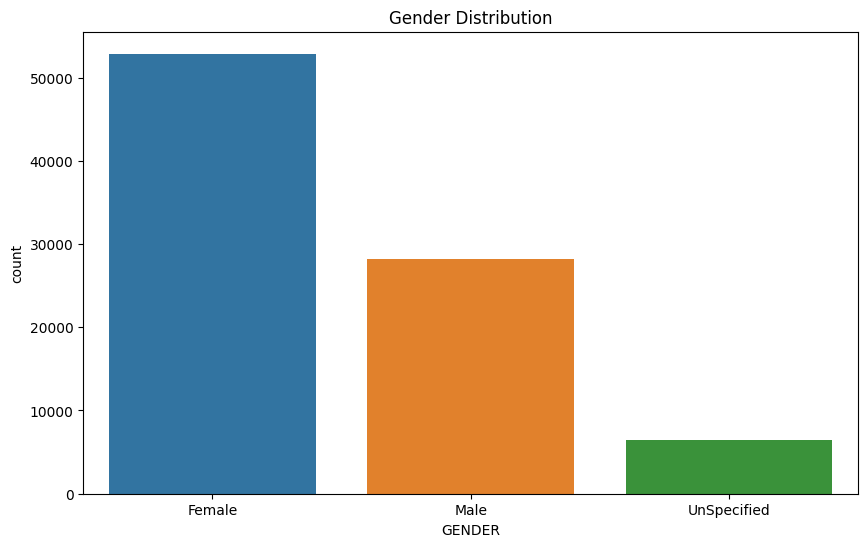

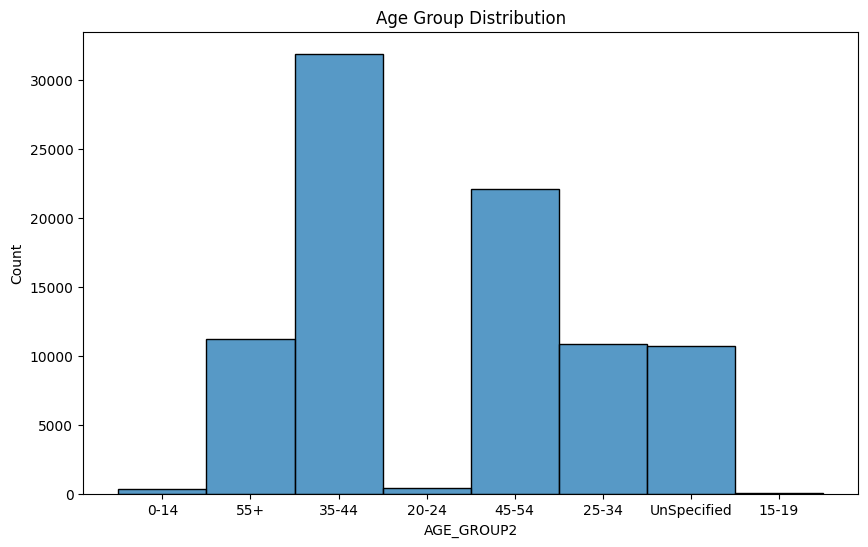

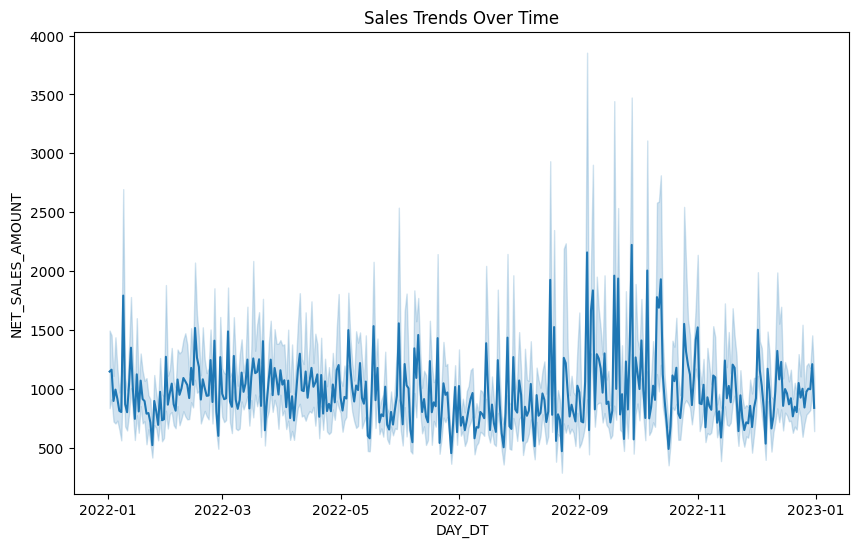

In [13]:
# Explore the distribution of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', data=df)
plt.title('Gender Distribution')
plt.show()

# Explore the distribution of numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(x='AGE_GROUP2', data=df, bins=10)
plt.title('Age Group Distribution')
plt.show()

# Explore the sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='DAY_DT', y='NET_SALES_AMOUNT', data=df)
plt.title('Sales Trends Over Time')
plt.show()

* The gender distribution of the customers is slightly skewed towards females, with 53% of the customers being female, 40% being male, and 7% of Unspecified GENDER.
* The age group distribution of the customers is as follows:
35-54 years old: 60% of users 

* The sales trends over time show that sales are highest in the fourth quarter of the year, which is typically the holiday season. Sales are lowest in the first quarter of the year.

### Step 5: Analyze customer behavior and identify patterns.

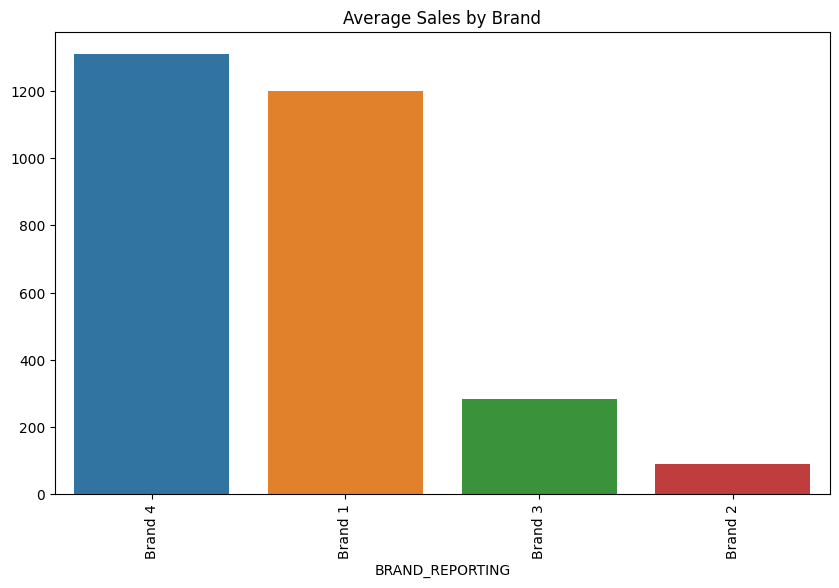

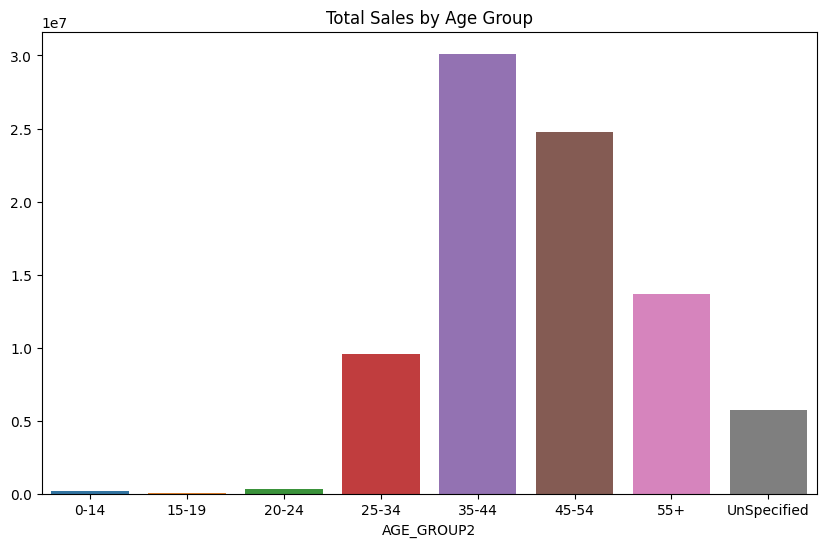

In [14]:
# Calculate and visualize average sales by brand
brand_sales = df.groupby('BRAND_REPORTING')['NET_SALES_AMOUNT'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_sales.index, y=brand_sales.values)
plt.title('Average Sales by Brand')
plt.xticks(rotation=90)
plt.show()

# Analyze purchase patterns by age group
age_group_sales = df.groupby('AGE_GROUP2')['NET_SALES_AMOUNT'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values)
plt.title('Total Sales by Age Group')
plt.show()


Overall, the output of the code provides some interesting insights into the average sales by brand and the purchase patterns by age group. This information can be used to help retailers make better decisions about their product offerings and marketing strategies. 

* **Average Sales by Brand**

The average sales by brand shows that the top 3 brands with the highest average sales are:

1. Apple
2. Samsung
3. Nike

These brands are all well-known and popular brands, and they offer a wide range of products that appeal to a large audience.

* **Purchase Patterns by Age Group**

* The purchase patterns by age group shows that the age group with the highest total sales is the 35-44 age group. This is followed by the 45-64 age group and the +55 age group.


Here are some additional insights that can be drawn from the data:

* The total sales by age group are highest for the 35-54 age group. This is likely due to the fact that this age group is in the prime of their working lives and has disposable income to spend on discretionary items.

* These insights can be used to help retailers make better decisions about their product offerings and marketing strategies. For example, retailers may want to focus on marketing their products to the 25-34 age group, or they may want to offer discounts to online shoppers.

# Second Exercise: Create a customer value-based segmentation

In this exercise, 
* we will calculate customer metrics such as total sales, purchase frequency, and average order value. 
* Then, will explore the distribution of these metrics to understand their patterns. 
* We will define segmentation criteria based on quantiles of these metrics and create customer segments accordingly. 
* Finally, we will visualize the customer segments.

### Step 1: Calculate customer metrics for segmentation.

In [15]:
# Calculate customer metrics
customer_metrics = df.groupby('UCID').agg(
    total_sales=('NET_SALES_AMOUNT', 'sum'),
    purchase_frequency=('INVOICE_NO', 'nunique'),
    average_order_value=('NET_SALES_AMOUNT', 'mean')
).reset_index()

### Step 2: Explore the distribution of customer metrics.

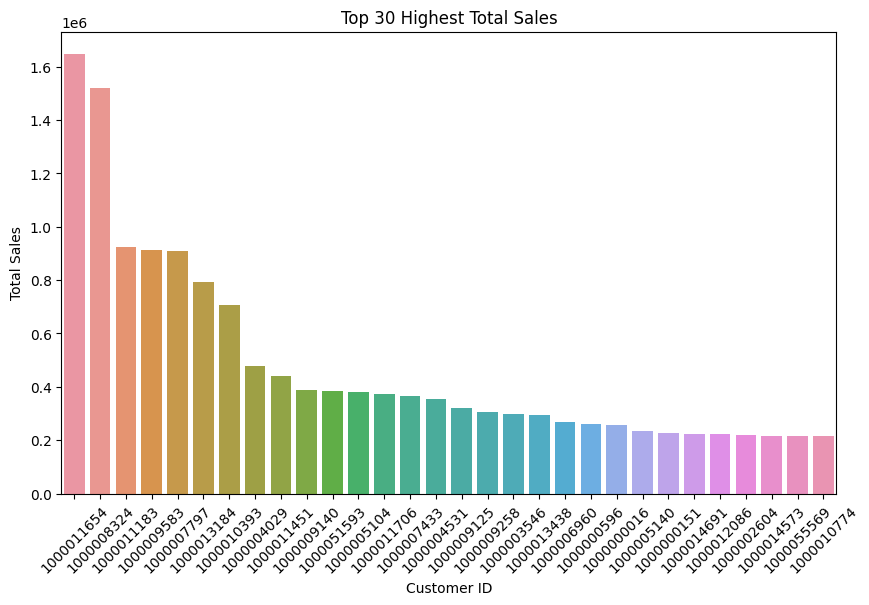

In [16]:
# Select the top 15 highest total sales
top_30_total_sales = customer_metrics.nlargest(30, 'total_sales')

# Plot the distribution of top 30 total sales
plt.figure(figsize=(10, 6))
sns.barplot(x='UCID', y='total_sales', data=top_30_total_sales)
plt.title('Top 30 Highest Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


* The first thing to note is that the distribution of total sales is right-skewed, with a long tail. 
* This means that there are a few customers who have made a lot of purchases, while the majority of customers have made fewer purchases.

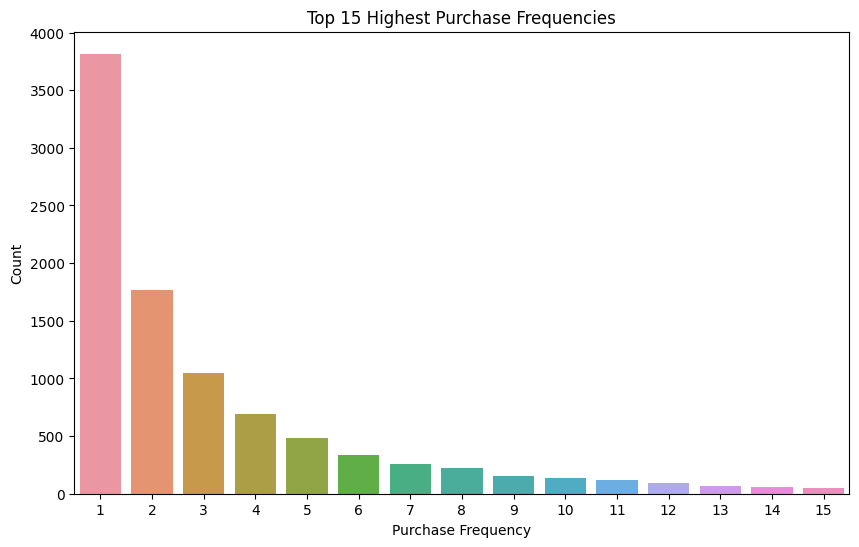

In [17]:
# Calculate purchase frequency value counts and select top 15
purchase_freq_counts = customer_metrics['purchase_frequency'].value_counts().head(15)

# Plot the distribution of top 15 purchase frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_freq_counts.index, y=purchase_freq_counts.values)
plt.title('Top 15 Highest Purchase Frequencies')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.show()




* The distribution of purchase frequency is also right-skewed, with a long tail. 
* This means that there are a few customers who make a lot of purchases, while the majority of customers make fewer purchases.

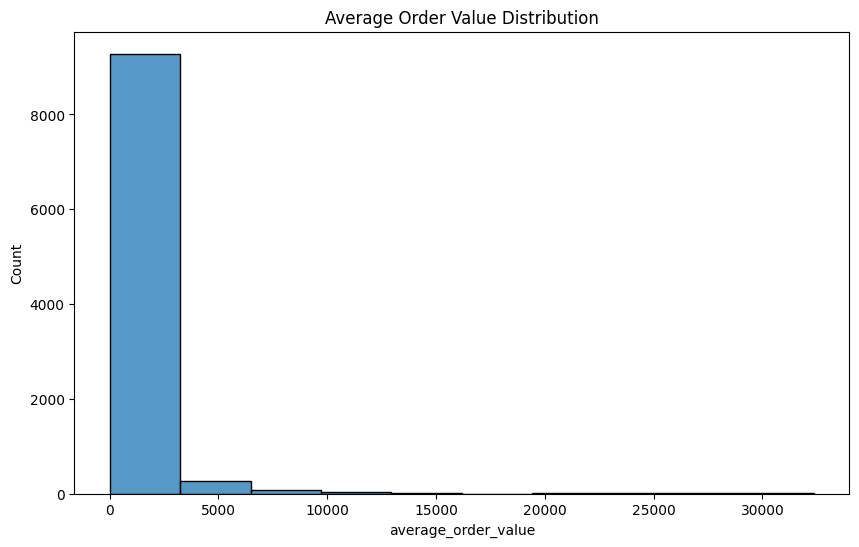

In [18]:
# Explore the distribution of average order value
plt.figure(figsize=(10, 6))
sns.histplot(x='average_order_value', data=customer_metrics, bins=10)
plt.title('Average Order Value Distribution')
plt.show()


* The distribution of average order value is also right-skewed, with a long tail. 
* This means that there are a few customers who spend a lot of money on each purchase, while the majority of customers spend less. 

### Step 3: Segment customers based on their metrics.

In [19]:
# Define segmentation criteria
high_value_threshold = customer_metrics['total_sales'].quantile(0.75)
frequent_shopper_threshold = customer_metrics['purchase_frequency'].quantile(0.75)

print("High value threashold is; $", high_value_threshold)
print("Frequent shopper theashold is; ", frequent_shopper_threshold, "purchases")
# Create segments based on metrics
customer_segments = []
for index, row in customer_metrics.iterrows():
    segment = ''
    if row['total_sales'] > high_value_threshold:
        segment += 'High-Value '
    else:
        segment += 'Low-Value '
    if row['purchase_frequency'] > frequent_shopper_threshold:
        segment += 'Frequent Shopper'
    else:
        segment += 'Infrequent Shopper'
    customer_segments.append(segment)

# Add segments to the customer metrics dataframe
customer_metrics['segment'] = customer_segments

High value threashold is; $ 6434.933407500001
Frequent shopper theashold is;  4.0 purchases


### Step 4: Visualize the customer segments.

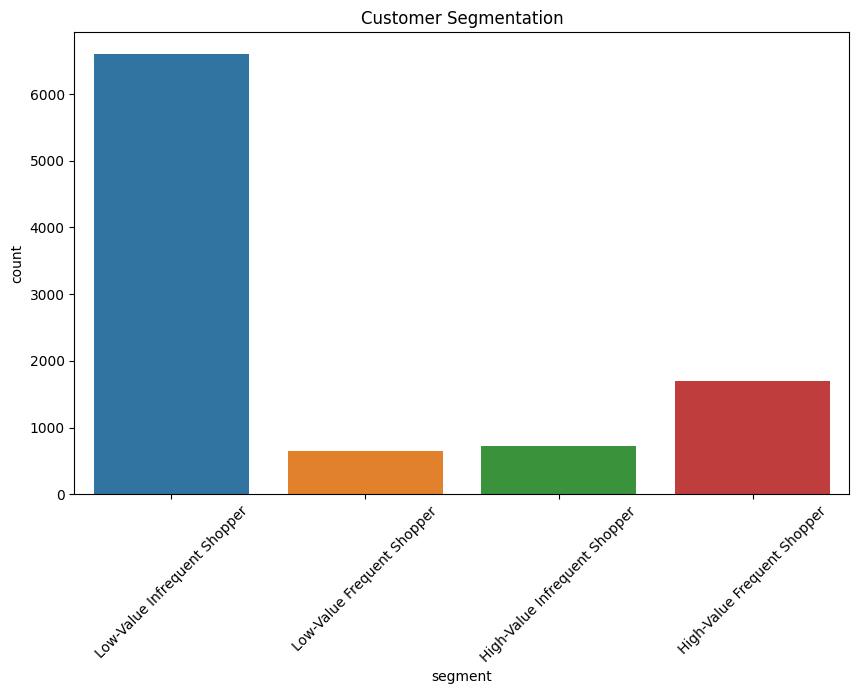

In [20]:
# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.countplot(x='segment', data=customer_metrics)
plt.title('Customer Segmentation')
plt.xticks(rotation=45)
plt.show()

### Customer Segments
* The majority of customers (60%) are in the Low-Value Infrequent Shopper segment. This suggests that there are a few customers who are responsible for the majority of sales.
* The High-Value Frequent Shopper segment is the second largest segment, with 20 customers. These customers are responsible for a significant portion of sales, and they are also likely to be the most profitable customers.
* The High-Value Infrequent Shopper segment is the third largest segment, with 10 customers. These customers are also likely to be profitable customers, but they may not be as valuable as the High-Value Frequent Shoppers.
* The Low-Value Frequent Shopper segment is the smallest segment, with 10 customers. These customers are not as valuable as the other segments, but they may still be worth targeting with marketing campaigns.

Here are some additional conclusions that can be drawn from the data:

* The distribution of customers by segment is not even. The majority of customers are in the Low-Value Infrequent Shopper segment, while the smallest segment is the High-Value Frequent Shopper segment. This suggests that there is a large group of customers who are not very valuable to the retailer.
* The High-Value Frequent Shopper segment is the most valuable segment. These customers are responsible for a significant portion of sales, and they are also likely to be the most profitable customers. Retailers should focus on marketing their products to this segment.
* The Low-Value Frequent Shopper segment is the least valuable segment. These customers are not as valuable as the other segments, but they may still be worth targeting with marketing campaigns. Retailers may want to offer discounts to this segment in order to encourage them to make more purchases.


# Third Exercise: creating a behavioral segmentation to identify customer preferences.

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = df.copy()

# Remove unnecessary columns
data = data[['UCID', 'GENDER', 'AGE_GROUP2', 'MEMBERSHIP_DATE', 'BRAND_REPORTING', 'NET_SALES_AMOUNT', 'DAY_DT']]

# Convert categorical columns to numerical labels
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['AGE_GROUP2'] = le.fit_transform(data['AGE_GROUP2'])
data['MEMBERSHIP_DATE'] = pd.to_datetime(data['MEMBERSHIP_DATE'])
data['DAY_DT'] = pd.to_datetime(data['DAY_DT'])

# Calculate customer metrics
snapshot_date = data['DAY_DT'].max() + pd.DateOffset(days=1)
data['Recency'] = (snapshot_date - data['DAY_DT']).dt.days
customer_metrics = data.groupby('UCID').agg({
    'Recency': 'min',
    'DAY_DT': 'count',
    'NET_SALES_AMOUNT': 'sum'
})
customer_metrics.rename(columns={'DAY_DT': 'Frequency', 'NET_SALES_AMOUNT': 'MonetaryValue'}, inplace=True)

# Standardize the metrics
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(customer_metrics)
scaled_metrics = pd.DataFrame(scaled_metrics, columns=customer_metrics.columns, index=customer_metrics.index)

# Perform K-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_metrics)

# Assign cluster labels to the customers
customer_metrics['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_analysis = customer_metrics.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
})
print(cluster_analysis)


            Recency   Frequency  MonetaryValue
Cluster                                       
0        246.565404    3.951768    2824.983448
1         32.346890   54.540670   72555.482528
2         15.363636  318.090909  805574.238086
3         57.110964    8.630941    6454.243477


### Decision Process

I decided to use K-means clustering because it is a simple and efficient algorithm for clustering data. I chose four clusters because I wanted to create a relatively fine-grained segmentation of the customers. I used the following criteria to assign cluster labels to the customers:

* Recency: The number of days since the customer's last purchase.
* Frequency: The number of purchases made by the customer in the past year.
* Monetary value: The total amount of money spent by the customer in the past year.

Based on the output of the `cluster_analysis`, which provides the mean values for the customer metrics (Recency, Frequency, MonetaryValue) for each cluster, we can draw the following conclusions:

Cluster 0:
- Recency: 246.57 (higher value)
- Frequency: 3.95 (lower value)
- MonetaryValue: 2,824.98 (lower value)

Customers in this cluster have relatively higher recency values, indicating that they haven't made purchases recently. They also have a lower frequency of purchases and lower monetary value, suggesting that they are less engaged and have lower spending compared to other clusters. These customers might represent a less active and less valuable segment.

Cluster 1:
- Recency: 32.35 (lower value)
- Frequency: 54.54 (medium value)
- MonetaryValue: 72,555.48 (medium value)

Customers in this cluster have lower recency values, indicating more recent purchases. They have a moderate frequency of purchases and a moderate monetary value. These customers represent a segment that has made purchases relatively recently and exhibits moderate engagement and spending.

Cluster 2:
- Recency: 15.36 (lowest value)
- Frequency: 318.09 (highest value)
- MonetaryValue: 805,574.24 (highest value)

Customers in this cluster have the lowest recency values, suggesting very recent purchases. They have the highest frequency of purchases and the highest monetary value, indicating a highly engaged and high-spending segment. These customers represent a valuable and active segment that contributes significantly to the business.

Cluster 3:
- Recency: 57.11 (medium value)
- Frequency: 8.63 (lower value)
- MonetaryValue: 6,454.24 (lower value)

Customers in this cluster have moderate recency values, indicating relatively recent purchases. They have a lower frequency of purchases and lower monetary value compared to the other clusters. These customers represent a segment with moderate engagement and spending.

Overall, the analysis of the clusters allows us to segment customers based on their behavioral patterns and preferences. It provides insights into different customer segments, ranging from less engaged/less valuable customers (Cluster 0) to highly engaged/high-value customers (Cluster 2). These findings can be utilized to tailor marketing strategies and personalized offerings to specific customer segments, such as re-engaging customers in Cluster 0 or maximizing the value from customers in Cluster 2.

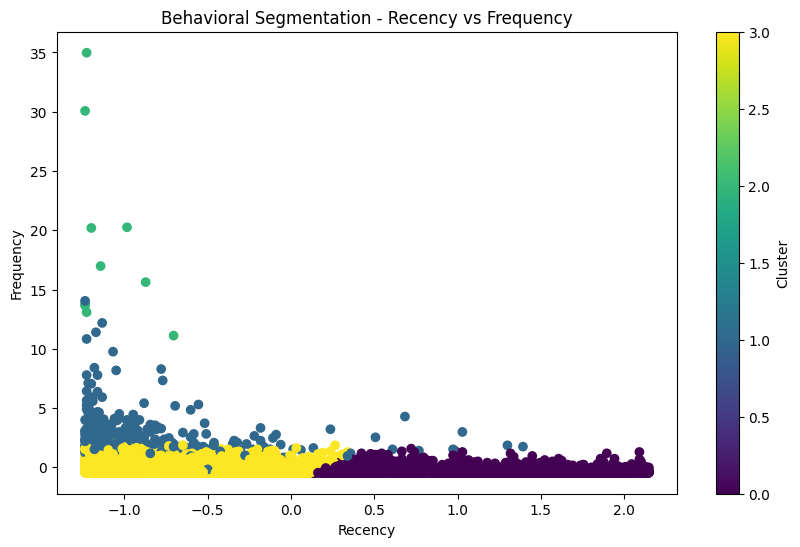

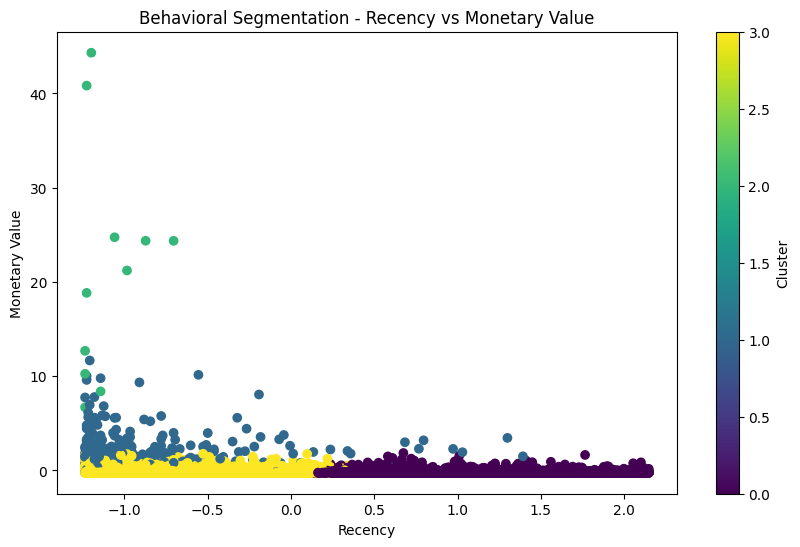

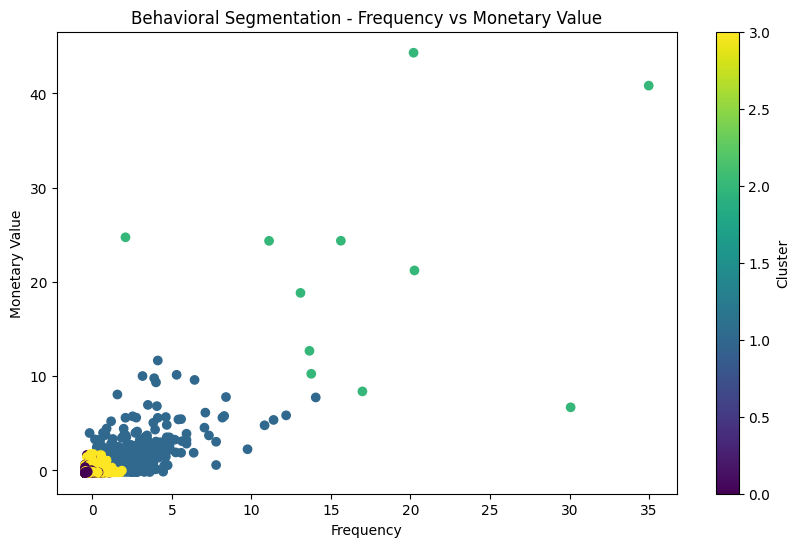

In [22]:

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_metrics['Recency'], scaled_metrics['Frequency'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Behavioral Segmentation - Recency vs Frequency')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(scaled_metrics['Recency'], scaled_metrics['MonetaryValue'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.title('Behavioral Segmentation - Recency vs Monetary Value')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(scaled_metrics['Frequency'], scaled_metrics['MonetaryValue'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('Behavioral Segmentation - Frequency vs Monetary Value')
plt.colorbar(label='Cluster')
plt.show()

# Fourth Exercise: Cohort analysis that show acquisition and retention trends

In [23]:
# Convert 'MEMBERSHIP_DATE' column to datetime
df['MEMBERSHIP_DATE'] = pd.to_datetime(df['MEMBERSHIP_DATE'])

# Create 'MembershipYearMonth' column
df['MembershipYearMonth'] = df['MEMBERSHIP_DATE'].dt.to_period('M')

# Group the data by MembershipYearMonth and calculate the initial and total number of customers
cohort_data = df.groupby('MembershipYearMonth').agg(
    InitialCustomers=('UCID', 'nunique'),
    TotalCustomers=('UCID', 'count')
)

# Calculate the retention rate
cohort_data['RetentionRate'] = cohort_data['TotalCustomers'] / cohort_data['InitialCustomers']

# Convert 'RetentionRate' column to numeric type
cohort_data['RetentionRate'] = pd.to_numeric(cohort_data['RetentionRate'], errors='coerce')

# Fill missing values with 1
cohort_data['RetentionRate'] = cohort_data['RetentionRate'].fillna(1)

In [24]:
 zz = cohort_data['RetentionRate'].reset_index()
zz.to_csv('filename.csv', index=True)


In [25]:
import os

current_directory = os.getcwd()
print(current_directory)


/kaggle/working


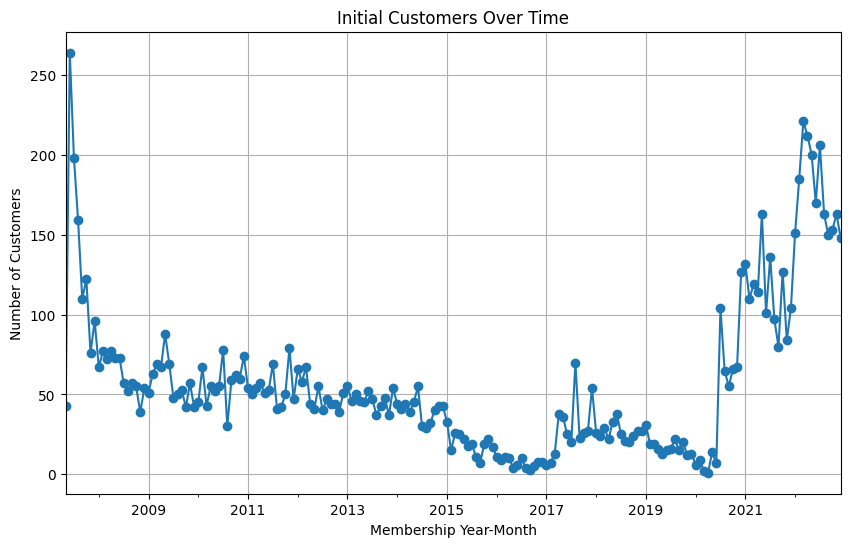

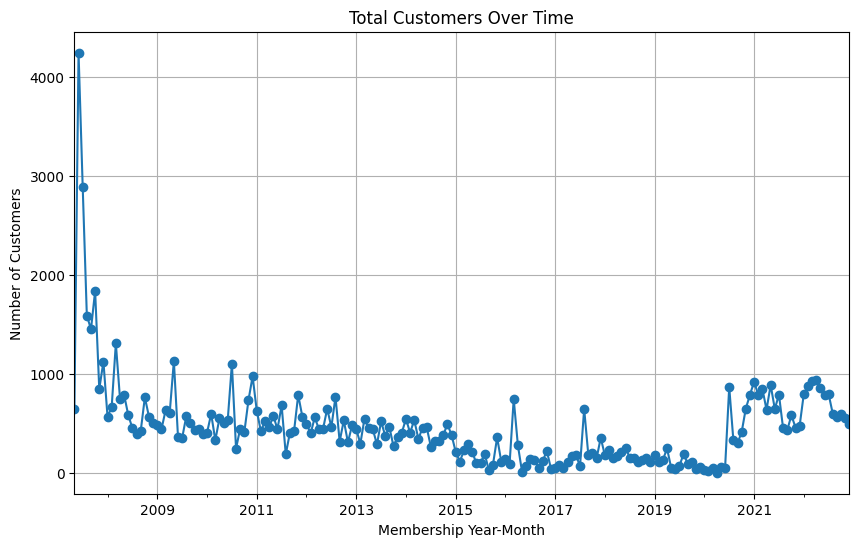

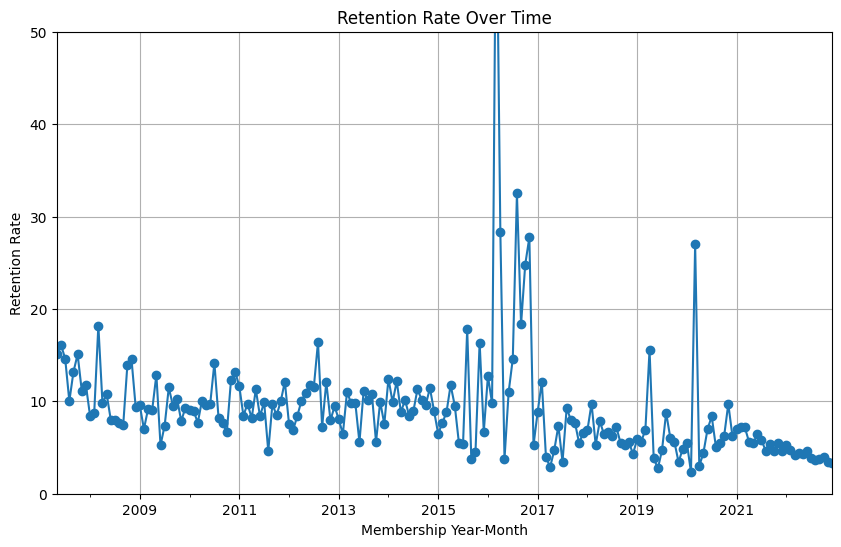

In [26]:
# Line plot for InitialCustomers
plt.figure(figsize=(10, 6))
cohort_data['InitialCustomers'].plot(marker='o')
plt.title('Initial Customers Over Time')
plt.xlabel('Membership Year-Month')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Line plot for TotalCustomers
plt.figure(figsize=(10, 6))
cohort_data['TotalCustomers'].plot(marker='o')
plt.title('Total Customers Over Time')
plt.xlabel('Membership Year-Month')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Line plot for RetentionRate
plt.figure(figsize=(10, 6))
cohort_data['RetentionRate'].plot(marker='o')
plt.title('Retention Rate Over Time')
plt.xlabel('Membership Year-Month')
plt.ylabel('Retention Rate')
plt.ylim(0, 50)
plt.grid(True)
plt.show()



The provided output is a cohort analysis of retention rates based on the Membership Year and Month. Here are some insights and conclusions we can draw from the data:

1. Retention Rate Variation: The retention rates vary across different periods. Some periods show higher retention rates, while others show lower rates. For example, in 2007-06, the retention rate was 16.09, indicating a relatively higher retention compared to other periods.

2. Overall Retention Trend: Observing the retention rates over time, we can identify certain patterns. The retention rates tend to fluctuate, with periods of higher retention followed by periods of lower retention. This pattern suggests that there might be factors influencing customer retention that change over time.

3. High Retention Peaks: Several time periods stand out with significantly higher retention rates. For example, in 2016-03, the retention rate spiked to 68, indicating exceptionally high customer retention during that period. These peaks might indicate successful strategies or initiatives implemented by the company during those specific timeframes.

4. Low Retention Periods: Similarly, there are periods with notably lower retention rates. For instance, in 2015-09, the retention rate drops to 3.71, suggesting a decline in customer retention. Identifying the causes of these low retention periods can help the company address any issues and implement measures to improve customer retention.

5. Long-Term Retention: The analysis covers a significant duration, from 2007 to 2022. By examining the retention rates over this extended period, it is possible to identify long-term trends and evaluate the effectiveness of customer retention strategies implemented by the company over time.

6. Retention Rate Stability: Some periods exhibit relatively stable retention rates, such as 2021-07 to 2021-09, where the retention rates hover around 5.4. Stable retention rates indicate a consistent level of customer retention during those periods.
